Loyihamiz maqsadi `Abalone` yoshini bashorat qilish, ya'ni barcha ustunlarga nisbatan `Rings` ustunini bashorat qilamiz.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn # scikit-learn kutubxonasi
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

### Ma'lumotlarni o'qiymiz

In [42]:
url = "https://raw.githubusercontent.com/farkhod-developer/Datasets_Practice/main/abalone.data.csv"
df = pd.read_csv(url)
df.head()

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## **Ta'rif**

- `gender`	--->  *Jins (M: Erkak, F: Ayol, I: Go'dak)*

- `Length`	--->  *Eng uzun qobiq o'lchami (millimetr - mm)*

- `Diameter`	--->  *Diametri - uzunlikka perpendikulyar (mm)*

- `Height`	--->  *Balandligi - qobiqdagi go'sht bilan (mm)*

- `Whole weight`	--->  *Butun abalonening vazni (gramm)*

- `Shucked weight`	--->  *Go'shtning vazni (gramm)*

- `Viscera weight`	--->  *Qon ketishdan keyin ichak vazni (gramm)*

- `Shell weight`	--->  *Qobiq og'irligi - quritilganidan keyin (gramm)*

- `Rings`  --->  *Halqalar soni - qiymat + 1,5 yoshni yillar bo'yicha beradi (masalan, 4 = 5,5 yil)*

In [43]:
df.shape

(4177, 9)

datasetimiz `4177` ta qator va `9` ta ustundan iborat ekan

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [45]:
df.duplicated().sum()

0

datasetimizda takrorlangan qiymatlar yo'q ekan

In [46]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Korrelyatsiya

In [47]:
df.corrwith(df['Rings']).abs().sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
dtype: float64

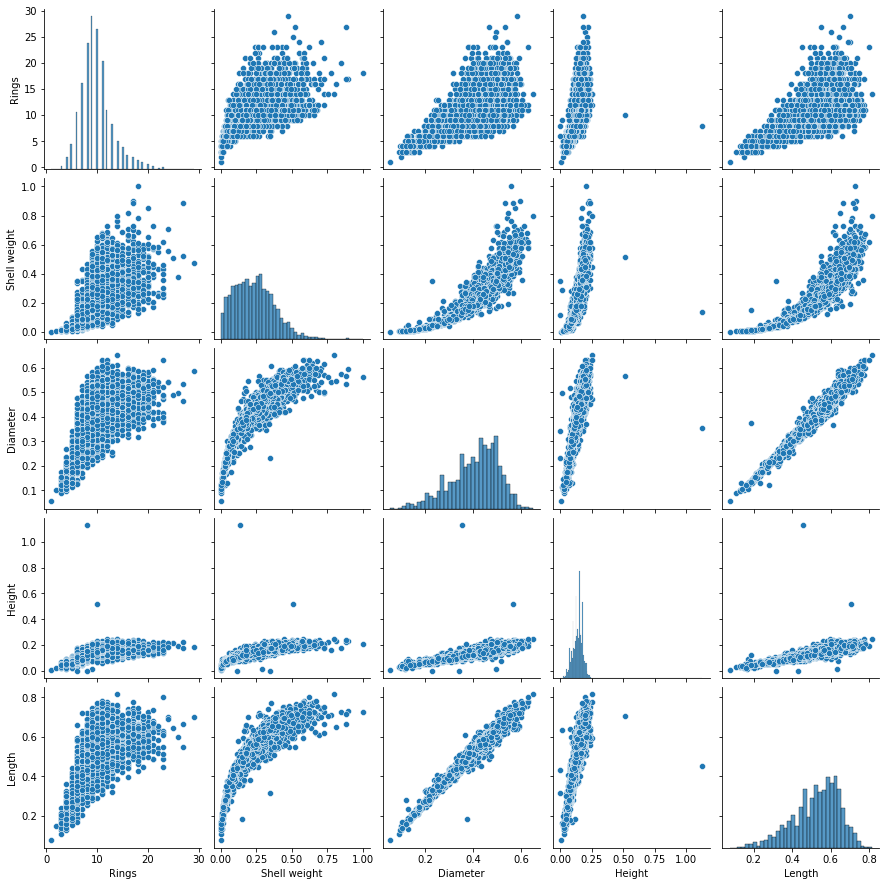

In [48]:
sns.pairplot(df[['Rings','Shell weight','Diameter','Height','Length']])
plt.show()

`korrelyatsiyasi` 55 dan baland bo'lgan ustunlarni vizualizatsiyasini chiqarib oldik

### Ma'lumotlarni tahlil qilishning yana bir usuli `Normalizatsiya`

![normal taqsimot](https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png)

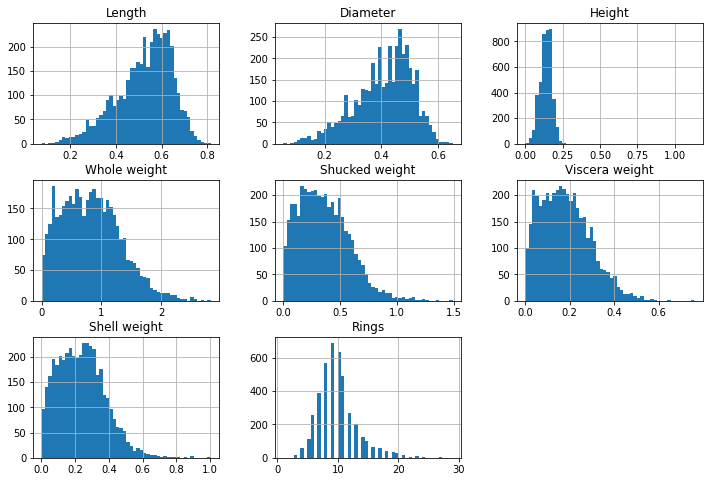

In [49]:
df.hist(bins=50, figsize=(12,8))
plt.show()

biz uchun kerakli ustun `Rings` ustuni, ko'rib turganingizdek `normalizatsiyasi` yaxshi holatda

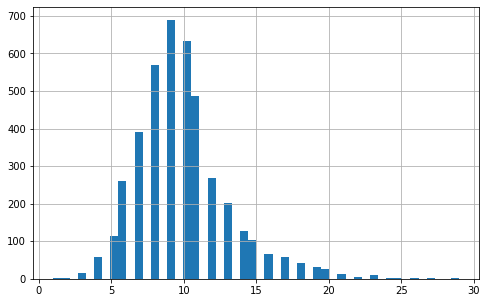

In [50]:
df['Rings'].hist(bins=50, figsize=(8,5))
plt.show()

### Ma'lumotlarni train va testga ajratamiz.

In [51]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop("Rings", axis=1)
y = train_set["Rings"].copy()

X_num = X_train.drop("gender", axis=1)

# Pipeline quramiz

**Sonli ustunlar uchun**

In [52]:
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())             
])

**Matnli ustunlar uchun**

In [53]:
num_attribs = list(X_num)
cat_attribs = ['gender']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

**`gender`** ustunimizni `OneHotEncoder()` yordamida avtomatik ravishda raqamli ma'lumotga almashtiradi ya'ni mos keluvchi qiymatga 1 qolganiga esa 0 (`1,0,0`|`0,1,0`|`0,0,1`) qaytaradi

Mana yakuniy, to'liq konveyer tayyor bo'ldi (`full_pipeline`).

Konveyerni ishga tushirish uchun `.fit_transform()` metodini chaqrisih kifoya.

In [54]:
X_prepared = full_pipeline.fit_transform(X_train)

In [55]:
X_prepared[0:5,:]

array([[ 0.21017452,  0.36972535, -0.34795017, -0.32316418, -0.32540694,
        -0.40512998, -0.21213236,  0.        ,  1.        ,  0.        ],
       [-0.41944448, -0.5423862 , -0.93608206, -0.66598541, -0.48012641,
        -0.82093157, -0.71241871,  0.        ,  1.        ,  0.        ],
       [-1.84658088, -1.85988065, -1.64184034, -1.3882497 , -1.35462776,
        -1.34639511, -1.39137875,  1.        ,  0.        ,  0.        ],
       [-2.09842848, -2.11324497, -1.75946671, -1.45335522, -1.36359701,
        -1.53373429, -1.46284823,  0.        ,  1.        ,  0.        ],
       [-0.25154608, -0.28902188, -0.11269741, -0.40963244, -0.43752249,
        -0.350299  , -0.17639762,  0.        ,  0.        ,  1.        ]])

Ma'lumotlar ML uchun tayyor.

# Machine Learning

Bizning maqsadimiz bashorat qilish, buning uchun bir nechta ML algoritmlar mavjud.  
`scikit-learn` tarkibidagi ba'zi tayyor algoritmlardan foydalanamiz.

#### Linear Regression - Chiziqli regressiya
`sklearn` tarkibidagi `LinearRegression` klassidan yangi model yaratamiz.

In [56]:
LR_model = LinearRegression()

`LinearRegression` bu estimator. Estimatorlar ma'lumotlarni qabul qilib oladi va `.fit()` metodi yordamida ulardan basorat qilishni _o'rganadi_ (machine _learning_)

In [57]:
LR_model.fit(X_prepared, y)

LinearRegression()

**TAMOM!** Machine Learning tugadi! Ha, adashmadingiz, bor yo'g'i 3 qator kod bilan biz hozirgina kompyuterga abalone yoshini bashorat qilishni o'rgatdik.

Modelni qanday qilib tekshirib ko'rishimiz mumkin? Keling `abalone` datasetdan biror qatorni modelga beramiz va chiqqan natijani bizdagi bor natija (label) bilan solishtiramiz.

In [58]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
507,M,0.585,0.455,0.225,1.0550,0.3815,0.2210,0.3650
4047,M,0.620,0.485,0.145,1.0030,0.4655,0.2195,0.2800
2086,F,0.710,0.500,0.150,1.3165,0.6835,0.2815,0.2800
3281,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200
2935,M,0.620,0.475,0.195,1.3585,0.5935,0.3365,0.3745


In [59]:
# yuqoridagi qatorlarga mos keluvchi yoshlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

507     15
4047    11
2086    10
3281    11
2935    10
Name: Rings, dtype: int64

`test_data` ni pipelinedan o'tkazib, bizga kerak ko'rinishga keltirib olamiz.

**Ahamiyat bering** bu safar biz `.transform()` metodini chaqiramiz, sababi `.fit()` metodini avval chaqirgan edik.

In [60]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 0.50399672,  0.47107108,  2.00457742,  0.45606744,  0.09390525,
         0.36707297,  0.89564455,  0.        ,  0.        ,  1.        ],
       [ 0.79781893,  0.77510826,  0.12255535,  0.35027098,  0.47061353,
         0.35336522,  0.28815398,  0.        ,  0.        ,  1.        ],
       [ 1.55336173,  0.92712685,  0.24018173,  0.98810156,  1.4482612 ,
         0.919952  ,  0.28815398,  1.        ,  0.        ,  0.        ],
       [ 0.21017452,  0.42039821,  0.71068725, -0.04239665, -0.19535289,
        -0.2177908 , -0.14066289,  0.        ,  0.        ,  1.        ],
       [ 0.79781893,  0.67376253,  1.29881914,  1.07355255,  1.04464519,
         1.4225693 ,  0.96354055,  0.        ,  0.        ,  1.        ]])

Bashorat (predict) qilamiz:

In [61]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([13.93244944, 10.5244341 ,  8.41375307, 11.76443391, 11.23050367])

Yuoqirda ko'rib turganingiz bashorat qilingan qiymatlar. Xo'sh, ular real qiymatlardan qanday farq qiladi, solishtiramiz:

In [62]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})


,Prognoz,Real baxosi
507,13.932449,15
4047,10.524434,11
2086,8.413753,10
3281,11.764434,11
2935,11.230504,10


# Modelni baholaymiz

Ko'rib turganingizdek, modelimiz qayerdadur kamroq, qayeradur ko'proq xato bilan bashorat qilgan. 
Lekin model aniqligini baxolash uchun 5 qator yetarli emas. Keling, avvalroq ajratib olgan test set yordamida sinab ko'ramiz:

In [63]:
test_set


,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,9
1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,8
599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,16
1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,9
670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,14
...,...,...,...,...,...,...,...,...,...
3093,F,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.235,11
1651,F,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.265,8
2897,I,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.208,10
3953,I,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.184,8


Avval predictor ustunlarni ajratib olaylik (`Rings`) dan boshqa barcha ustunlar):

In [64]:
X_test = test_set.drop('Rings', axis=1)
X_test

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...,...
3093,F,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.235
1651,F,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.265
2897,I,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.208
3953,I,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.184


Label (`Rings`) ustunini ajratib olamiz.

In [65]:
y_test = test_set['Rings'].copy()
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
3093    11
1651     8
2897    10
3953     8
1830     7
Name: Rings, Length: 836, dtype: int64

`test_set` ni ham pipelinedan o'tkazamiz:

In [66]:
X_test_prepared = full_pipeline.transform(X_test)

Bashorat qilamiz

In [67]:
y_predicted = LR_model.predict(X_test_prepared)

Bashorat va real datani solishtirish uchun Root mean square error (RMSE) dan foydalanamiz:

In [68]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2.2116130871218367


Demak, `RMSE` qilgan bashorat yaxshimi nima deb o'ylaysiz. Ya'ni modelimiz `abalonening` yoshini bashorat qilishda o'rtacha `2` yoshga adashayapti.  
Model aniqligini oshirish uchun yagona, universal yechim yo'q. Qilib ko'rishingiz mumkin bo'lgan ishlar:



## DecisionTree

In [69]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

Modelni tekshiramiz:

In [70]:
y_predicted = Tree_model.predict(X_test_prepared)

In [71]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2.9647046537910864


Avvalgidan katta farq qilmadi.

## RandomForest

In [72]:
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

Modelni tekshiramiz:

In [73]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2.2517703295906712


## Cross-Validation usuli bilan baholash

Yuqorida biz modelni baholash uchun ma'lumotlarni test va train setlarga ajratdik. 
Bu usulning kamchiligi biz test va train uchun doim bir xil ma'lumotlardan foydalanayapmiz. 

Cross-validation yordamida biz ma'lumotlarni bir necha qismga ajratib, modelni turli qismlar yordamida bir nechta bor train va test qilishimiz mumkin. 


Cross validation uchun ma'lumotlarni train va testga bo'lish shart emas, buni sklearn o'zi qiladi.

In [74]:
X = df.drop("Rings", axis=1)
y = df["Rings"].copy()

X_prepared = full_pipeline.transform(X)

Validation natijalarini ko'rsatish uchun sodda funksiya yasab olamiz

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

#### LogisticRegression

In [84]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=20)
LR_rmse_scores = np.sqrt(-scores)

In [85]:
display_scores(LR_rmse_scores)

Scores: [2.25765375 2.89633104 3.57848752 3.00918955 1.82741767 1.51851147
 1.61441137 1.63621916 1.73903476 2.19870927 2.4437688  3.22207592
 1.71541312 1.35095059 1.84845074 2.70855431 2.16872724 1.56642871
 2.41041678 1.63395966]
Mean: 2.1672355709650475
Std.dev: 0.6207776408833174


## Decision Tree

In [79]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [3.67456016 4.02563556 2.41605475 2.84445234 2.58584664 3.83043716
 2.31904947 3.1995953  2.70978332 2.88508943]
Mean: 3.0490504119115927
Std.dev: 0.5753432311632232


#### Random Forest

In [83]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=20)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [2.45308652 3.15068155 3.5820585  2.67110876 1.77690419 1.34852516
 1.59291794 1.63504796 1.76776601 1.56159408 2.70404305 3.16158703
 1.37791257 1.284967   1.72809559 2.91263113 1.95139847 1.4397813
 2.41282441 1.69418775]
Mean: 2.110355947754589
Std.dev: 0.6887858151282448


ko'rib turganingizdek eng yaxshi natija  `Cross-Validation` usulida `Random Forest` algoritmida eng kam xatolik bilan ishlamoqda